In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
#root_path = "/gdrive/My Drive/Moi_kaggle/covid_dataset.csv"
#df = pd.read_csv(root_path)

In [ ]:
df.head()
df.count()



Unnamed: 0          79438
paper_id            79438
doi                 77143
abstract            54180
body_text           79438
authors             78011
title               79437
journal             72458
abstract_summary    79438
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47311 entries, 0 to 79437
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        47311 non-null  int64 
 1   paper_id          47311 non-null  object
 2   doi               47311 non-null  object
 3   abstract          47311 non-null  object
 4   body_text         47311 non-null  object
 5   authors           47311 non-null  object
 6   title             47311 non-null  object
 7   journal           47311 non-null  object
 8   abstract_summary  47311 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


Unnamed: 0          47311
paper_id            47311
doi                 47311
abstract            47311
body_text           47311
authors             47311
title               47311
journal             47311
abstract_summary    47311
dtype: int64

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=57fab46f70677c25b315c0750bf445de1231116a27117af57d2fb0eff1a82c45
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    text = df.iloc[ii]['body_text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    #  beginning of the document was not in good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        except Exception as e:
            
            try:
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████| 47311/47311 [04:33<00:00, 172.86it/s]


In [ ]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
print(languages_dict)

Total: 47311

{'es': 262, 'tr': 1, 'pt': 14, 'tl': 1, 'nl': 55, 'it': 34, 'en': 46350, 'fr': 272, 'cy': 5, 'de': 314, 'af': 1, 'pl': 2}


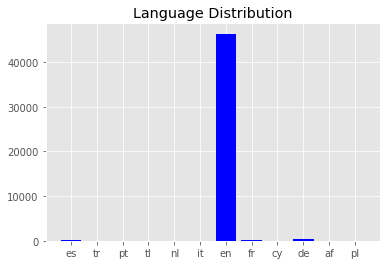

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center', color= 'blue')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Language Distribution")
plt.show()

In [ ]:
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46350 entries, 0 to 79437
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        46350 non-null  int64 
 1   paper_id          46350 non-null  object
 2   doi               46350 non-null  object
 3   abstract          46350 non-null  object
 4   body_text         46350 non-null  object
 5   authors           46350 non-null  object
 6   title             46350 non-null  object
 7   journal           46350 non-null  object
 8   abstract_summary  46350 non-null  object
 9   language          46350 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [ ]:
from IPython.utils import io
with io.capture_output() as captured:
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg 

In [ ]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['becoming',
 'via',
 "'m",
 'where',
 'for',
 'not',
 'can',
 'yet',
 'about',
 'rather']

In [ ]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [ ]:
# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [ ]:
tqdm.pandas()
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)

100%|██████████| 46350/46350 [4:19:41<00:00,  2.97it/s]


In [ ]:
#df1 = df["processed_text"]
df1.to_csv('/gdrive/My Drive/Moi_kaggle/covid_processed_bodytext.csv')

In [ ]:
root_path = "/gdrive/My Drive/Moi_kaggle/covid_processed.csv"
df = pd.read_csv(root_path) #1

In [ ]:
df_sample = df.sample(10000, random_state=1)#2
df_sample.head()

,Unnamed: 0,Unnamed: 0.1,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,language,processed_text
1475,2505,2505,9ff9bc0ba06c203b19df686a6822e53fae9bfa8f,10.1016/s0022-5347(17)55642-6,We present a case of disseminated atypical myc...,Although first described in 1918 it was not un...,"Thomas, Evan. Hillman, Bruce J.. Stanisic,<...",Urinary Tract Infection with Atypical<br>Myco...,The Journal of Urology,We present a case of disseminated atypical<br...,en,﻿1 describe 1918 runyon classification atypica...
31853,54737,54737,721b3e6ae8af24a4f625540bbb6e2c02fb77b491,10.1093/nar/gkr686,Several viruses utilize programmed ribosomal f...,The reading frame of the vast majority of mRNA...,"Tholstrup, Jesper. Oddershede, Lene B.. <br>...",mRNA pseudoknot structures can act as<br>ribo...,Nucleic Acids Res,Several viruses utilize programmed ribosomal<...,en,read frame vast majority mrnas determine start...
378,665,665,05618915fa6f26d3baccc20a3614a0da0dd6d0c8,10.1057/s41271-017-0066-z,Hand foot and mouth disease (HFMD) is a widesp...,"Background Hand, foot, and mouth disease (HFMD...","Siegel, Karen. Cook, Alex R. La, Hanh","The impact of hand, foot and mouth disease<br...",J Public Health Policy,Hand foot and mouth disease (HFMD) is a<br>wi...,en,background hand foot mouth disease hfmd largel...
26539,45566,45566,6a6c6cbb33ca5ec28d7925dbbde7c9701a4b89bb,10.1016/j.jhin.2004.12.023,The recent severe acute respiratory syndrome (...,Summary The recent severe acute respiratory sy...,"Rabenau, H. F.. Kampf, G.. Cinatl, J.. Doe...",Efficacy of various disinfectants against<br>...,Journal of Hospital Infection,The recent severe acute respiratory syndrome<...,en,summary recent severe acute respiratory syndro...
9300,16068,16068,fdbb87b5eea01d0d702b16c87270024a9dea1ae1,10.1007/s10745-020-00147-3,People are facing uncertain and difficult time...,I am a professor of plant biology and soil che...,"Sofo, Adriano. Sofo, Antonino",Converting Home Spaces into Food Gardens at t...,Hum Ecol Interdiscip J,People are facing uncertain and difficult<br>...,en,professor plant biology soil chemistry italian...


In [ ]:

sum(df_sample["processed_text"].duplicated())
df_sample["processed_text"].drop_duplicates()
text = df_sample['processed_text'].values #3

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):#4
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X
    
  


In [ ]:
text = df_sample['processed_text'].values
X = vectorize(text, 2**10)#5
X.shape

(10000, 1024)

In [ ]:
from sklearn.decomposition import PCA #6

pca = PCA(n_components=0.95, random_state=1)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape


(10000, 666)

In [ ]:
from sklearn.decomposition import PCA
import pprint as p
comps=PCA().fit(X.toarray())
lis=comps.explained_variance_ratio_

In [ ]:
lis=pd.DataFrame(lis)
lis2= range(1,1025)
lis2=pd.DataFrame(lis2)

In [ ]:
lis.to_csv('/gdrive/My Drive/Moi_kaggle/list1.csv')
lis2.to_csv('/gdrive/My Drive/Moi_kaggle/list2.csv')

In [ ]:
from sklearn.cluster import KMeans #7

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(5, 85,5)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=1).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print('Found distortion for {} clusters'.format(k))

Found distortion for 5 clusters
Found distortion for 10 clusters
Found distortion for 15 clusters
Found distortion for 20 clusters
Found distortion for 25 clusters
Found distortion for 30 clusters
Found distortion for 35 clusters
Found distortion for 40 clusters
Found distortion for 45 clusters
Found distortion for 50 clusters
Found distortion for 55 clusters
Found distortion for 60 clusters
Found distortion for 65 clusters
Found distortion for 70 clusters
Found distortion for 75 clusters
Found distortion for 80 clusters


range(5, 105, 5)


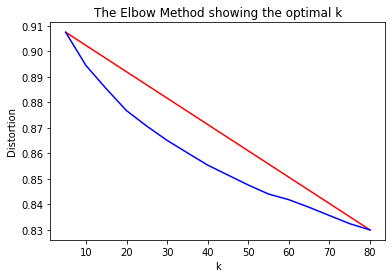

In [ ]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
import matplotlib.pyplot as plt
plt.plot(X_line, Y_line, 'r')
plt.plot(K, distortions, 'b-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:

from sklearn.metrics import silhouette_score

sil = []
kmax = 3

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(5, 105,5):
  kmeans = KMeans(n_clusters = k).fit(X_reduced)
  labels = kmeans.labels_
  sil.append(silhouette_score(X_reduced, labels, metric = 'euclidean'))

In [ ]:
print(sil)

[0.03345355180527709, 0.0374762269203605, 0.041898667628400874, 0.04643221654712994, 0.05035146657442937, 0.05365958491474356, 0.057875270006259937, 0.05624474144077349, 0.06034089037303728, 0.06387315332678771, 0.06373934863192075, 0.06467885784316074, 0.06519566530049482, 0.06596582074975352, 0.06578950440593846, 0.06542486880335302, 0.07159491351809628, 0.06705725514415165, 0.06804136796887286, 0.06730818228247691]


In [ ]:
k = 55 #run
kmeans = KMeans(n_clusters=k, random_state=1)
y_pred = kmeans.fit_predict(X_reduced)
df_sample['y'] = y_pred

In [ ]:
from sklearn.manifold import TSNE #run

tsne = TSNE(verbose=1, perplexity=100, random_state=1)
X_embedded = tsne.fit_transform(X_reduced)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.047s...
[t-SNE] Computed neighbors for 10000 samples in 177.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.332165
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.591698
[t-SNE] KL divergence after 1000 iterations: 1.787313


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


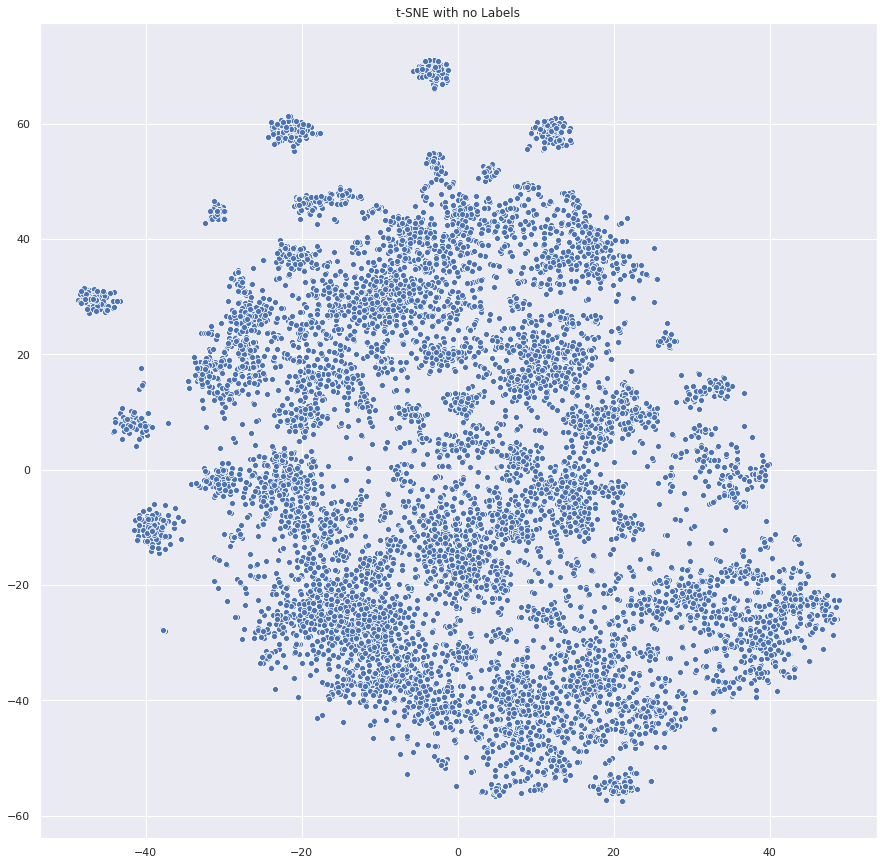

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns #run

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("dark", 55)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette= palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

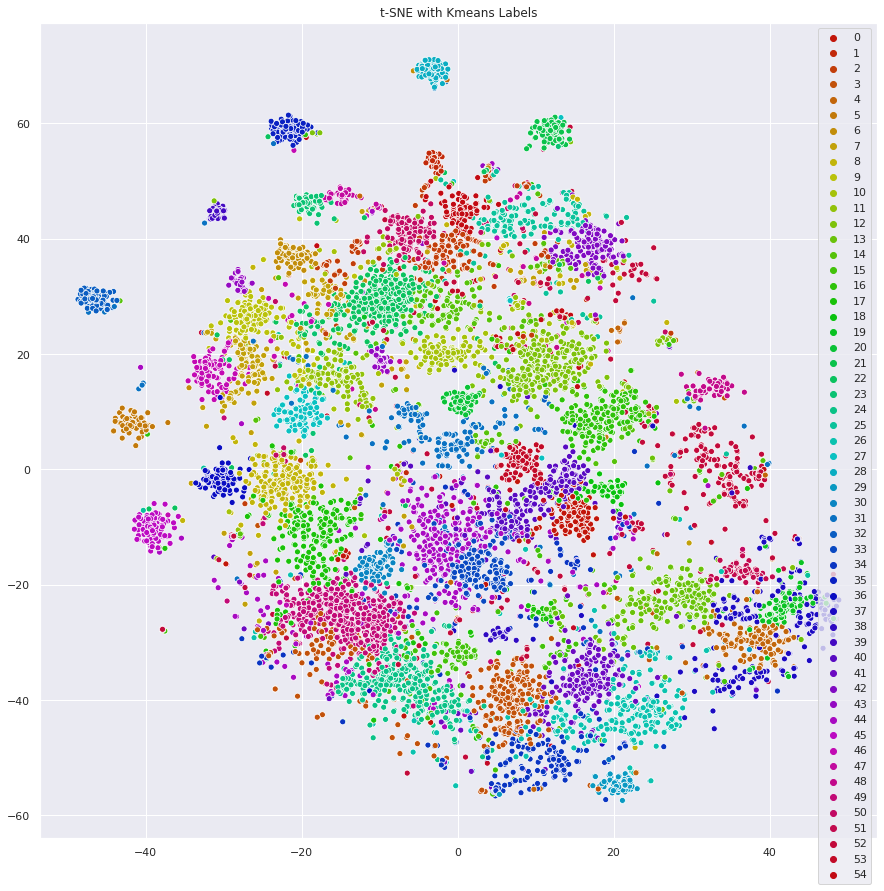

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns #run

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(55, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer#run

In [ ]:
vectorizers = []
    #run
for ii in range(0, 55):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [ ]:
vectorized_data = [] #run

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df_sample.loc[df_sample['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [ ]:
len(vectorized_data)#run

55

In [ ]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 10 #run

lda_models = []
for ii in range(0, 55):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=1)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [ ]:
clusters_lda_data = [] #run

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [ ]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3): #run
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [ ]:
all_keywords = [] #run
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [ ]:
all_keywords[0:5][:10] #run

[['virus',
  'respiratory',
  'case',
  'patient',
  'infection',
  'asthma',
  'wheeze',
  'symptom',
  'physical',
  'activity',
  'care',
  'pandemic',
  'need',
  'health',
  'sensitization',
  'nasal',
  'diarrhoea',
  'rhinitis',
  'pneumonia',
  'lung',
  'vitamin',
  'pneumococcal',
  'cold',
  'mmhg',
  'pertussis',
  'critical',
  'ventilation'],
 ['value',
  'frameshifting',
  'host',
  'ribosome',
  'translation',
  'frame',
  'overlap',
  'viral',
  'allele',
  'deletion',
  'mutation',
  'mutate',
  'species',
  'rna',
  'usage',
  'bias',
  'genome',
  'site'],
 ['fusion',
  'signal',
  'pathway',
  'replication',
  'structure',
  'eif',
  'lipid',
  'hiv',
  'expression',
  'hcv',
  'cleavage',
  'hsp',
  'host',
  'site',
  'receptor',
  'zikv',
  'denv',
  'glycoprotein',
  'ocular',
  'hnrnp',
  'integration',
  'mitochondrial',
  'erad',
  'fiber',
  'figures',
  'k-akt',
  'phospholipid',
  'acid'],
 ['health',
  'study',
  'pandemic',
  'high',
  'risk',
  'case',

In [ ]:
len(all_keywords)

55

In [ ]:
palette

In [ ]:
top10=[]
for i in range(0,len(all_keywords)):
  lst123=[]
  for j in range(0,10):
    lst123.append(all_keywords[i][j])
  top10.append(lst123)


In [ ]:
top10

[['virus',
  'respiratory',
  'case',
  'patient',
  'infection',
  'asthma',
  'wheeze',
  'symptom',
  'physical',
  'activity'],
 ['value',
  'frameshifting',
  'host',
  'ribosome',
  'translation',
  'frame',
  'overlap',
  'viral',
  'allele',
  'deletion'],
 ['fusion',
  'signal',
  'pathway',
  'replication',
  'structure',
  'eif',
  'lipid',
  'hiv',
  'expression',
  'hcv'],
 ['health',
  'study',
  'pandemic',
  'high',
  'risk',
  'case',
  'country',
  'test',
  'datum',
  'confirm'],
 ['sequence',
  'covid-',
  'feature',
  'test',
  'dataset',
  'word',
  'disease',
  'protein',
  'study',
  'patient'],
 ['canine',
  'virus',
  'rabies',
  'risk',
  'cat',
  'giant',
  'tooth',
  'joint',
  'habitat',
  'tumor'],
 ['irf',
  'tlr',
  'ifnl',
  'patient',
  'hcv',
  'astrocyte',
  'tgev',
  'sting',
  'ifn-l',
  'ifn-b'],
 ['infection',
  'drug',
  'tlr',
  'cancer',
  'activity',
  'sp-d',
  'lung',
  'group',
  'zinc',
  'receptor'],
 ['antibody',
  'sars-cov-',
  'sequ

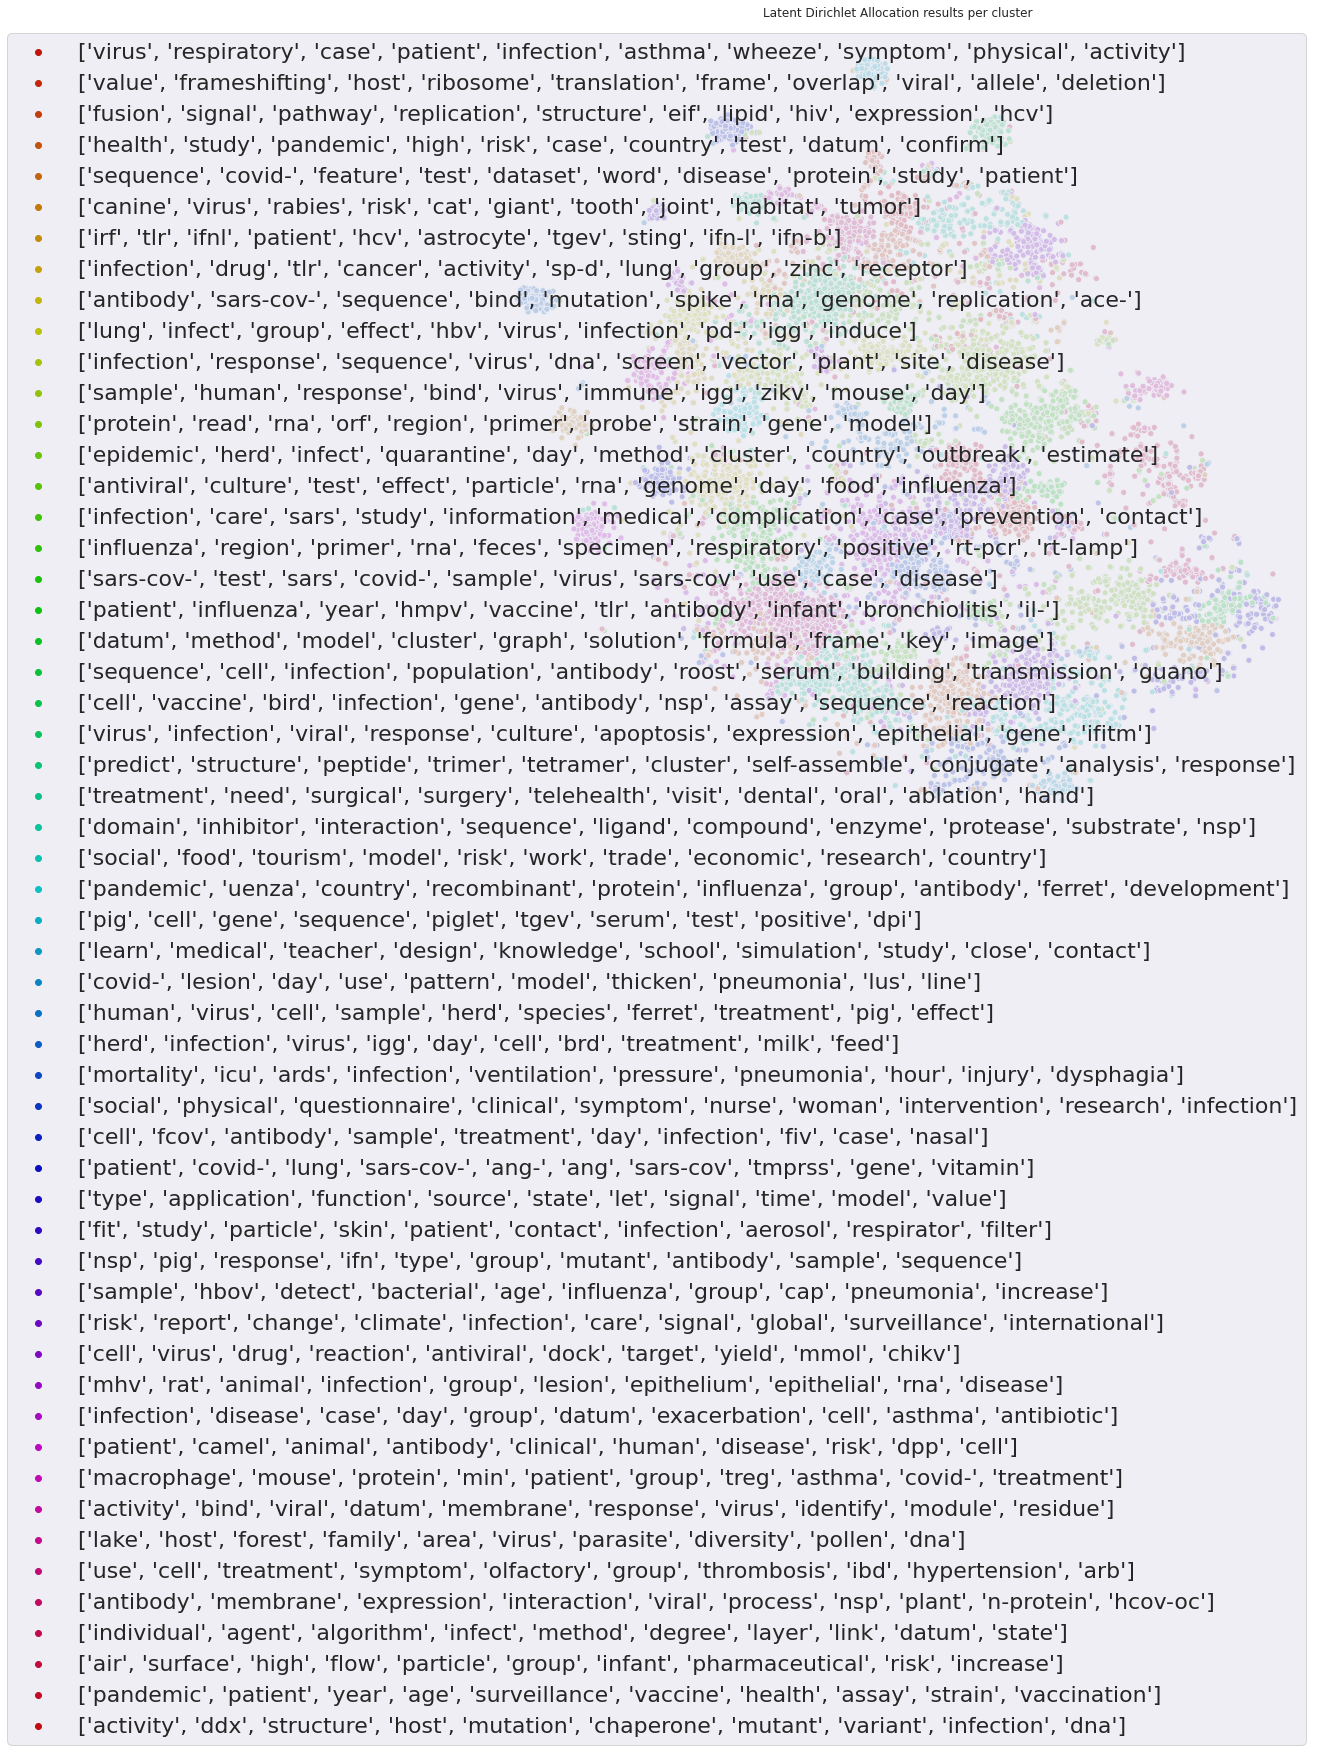

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns #run

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(55, l=.4, s=.9)

# plot
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.legend(prop={'size':22})
leg = g.axes.get_legend()
for t, l in zip(leg.texts, top10): t.set_text(l)
plt.title('Latent Dirichlet Allocation results per cluster')
plt.savefig("improved_cluster_tsne.png")
plt.gca().set_axis_off()
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
import matplotlib.pyplot as plt

for i in range(0,len(all_keywords)):
  unique_string=(" ").join(all_keywords[i])
  wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.savefig("/gdrive/My Drive/Wordclouds/"+str(i)+".png", bbox_inches='tight')
  plt.show()
  plt.close()

Output hidden; open in https://colab.research.google.com to view.